<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/BinaryClassificationScalarBackpropAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns 
import imageio 
from IPython.display import  HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["Red","Yellow","Green"])
np.random.seed(0)

#Generating Data and Plotting

In [82]:
data , labels = make_blobs(n_samples=1000, n_features =2, centers=4,random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


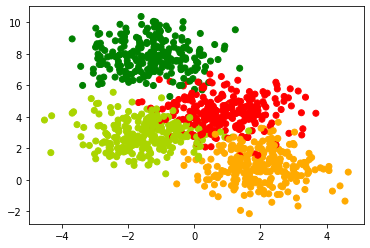

In [83]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
labels_original = labels 
labels = np.mod(labels_original,2)

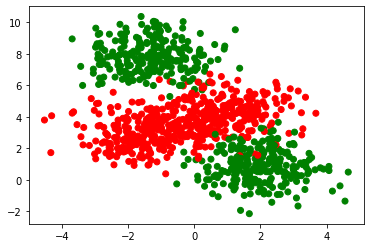

In [85]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(data,labels,stratify=labels,random_state=0)

#Scalar Feed Farward 

In [0]:
class FeedForward():

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0 
    self.b2 = 0 
    self.b3 = 0 

  def sigmoid(self,x):
    return (1 / (1 + np.exp(-x)))

  def forwardPass(self,x):
    self.x1, self.x2 =x 
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1) 
    self.a2 = self.w3*self.x1 + self.w4 * self.x2 + self.b2 
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3 
    self.h3 = self.sigmoid(self.a3)
    return self.h3 

  def grad(self,x,y):
    self.forwardPass(x)

    self.dw5 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h1
    self.dw6 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h2 
    self.db3 = (self.h3 - y) * self.h3 * (1 - self.h3)

    self.dw1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1 
    self.dw2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x2 
    self.db1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1)

    self.dw3 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x1 
    self.dw4 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x2
    self.db2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2)
      


  def fit(self,X, Y, epochs = 1 , learning_rate = 1, display_loss = False, display_weights = False):

    if display_loss :
      loss = {}
      
    for i in tqdm_notebook(range(epochs),total = epochs , unit = "epoch"):
      dw1 , dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2 
        dw3 += self.dw3
        dw4 += self.dw4 
        dw5 += self.dw5
        dw6 += self.dw6 
        db1 += self.db1 
        db2 += self.db2 
        db3 += self.db3 

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m  
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m  
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m  
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m  
      self.b3 -= learning_rate * db3 / m 

      if display_loss : 
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y,Y_pred)
      
      if display_weights: 
        weight_matrix = np.array([[0,self.b3,self.w5,self.w6,0,0],[self.b1, self.w1, self.w2, self.b2, self.w3,self.w4]])
        weight_matrices.append(weight_matrix)

    if display_loss:
      plt.tight_layout()
      plt.plot(list(loss.values()))
      plt.xlabel("Epochs")
      plt.ylabel("Loss")

      plt.show()

  def predict(self, X):
    y_pred = []
    for x in X : 
      pred = self.forwardPass(x)
      y_pred.append(pred)
    return np.array(y_pred)

  def predict_h1(self,X):
    h1_pred = []
    for x in X :
      pred = self.forwardPass(x)
      h1_pred.append(self.h1)
    return np.array(h1_pred)
  
  def predict_h2(self,X):
    h2_pred = []
    for x in X:
      pred = self.forwardPass(x)
      h2_pred.append(self.h2)
    return (np.array(h2_pred))

  def predict_h3(self,X):
    h3_pred =[]
    for x in X:
      pred = self.forwardPass(x)
      h3_pred.append(self.h3)
    return np.array(h3_pred)

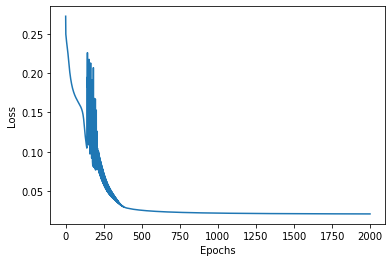

In [95]:
weight_matrices = []
ffn = FeedForward()
ffn.fit(X_train, Y_train, epochs = 2000 , learning_rate =5 , display_loss = True , display_weights= True  )

In [0]:
def make_meshgrid(x,y,h=0.2):
  x_min, x_max = x.min() - 0.5, x.max() + 0.5 
  y_min, y_max = y.min() - 0.5, y.max() + 0.5  
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))
  return xx,yy

def plot_contours(ax, predict,xx,yy,**params):
  z = predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  out = ax.contourf(xx,yy,z,**params)
  return out 


def plot_boundary():
  xx,yy = make_meshgrid(X_train[:,0],X_train[:,1])
  predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3]

  for i in range(3):
    fig , ax = plt.subplots(figsize = (10,5))
    plot_contours(ax, predict_functions[i],xx,yy,cmap = my_cmap, alpha = 0.2)
    ax.scatter(X_train[:,0], X_train[:,1],c = Y_train, cmap = my_cmap, alpha = 0.2 )
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title("h" + str(i + 1 ))
  return True


True

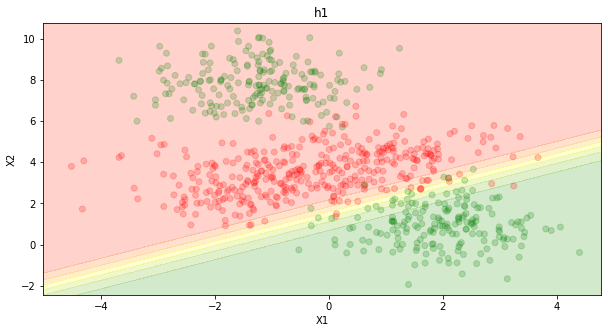

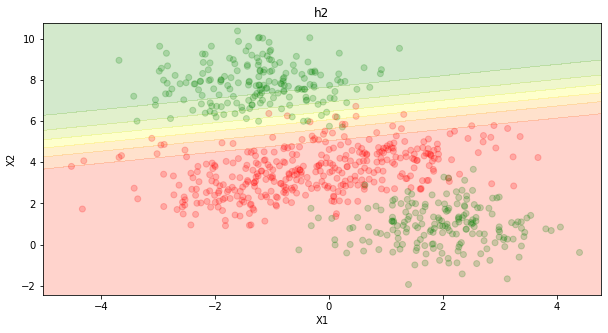

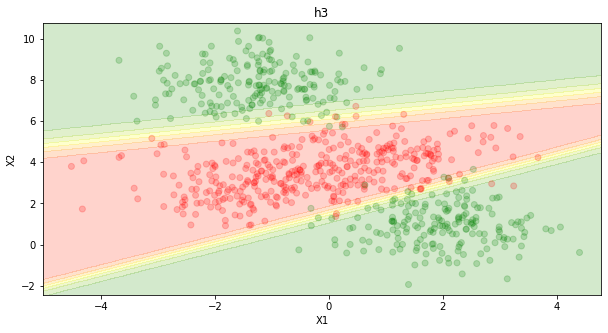

In [97]:
plot_boundary()

In [0]:
def plot_heat_map(epoch):
  fig = plt.figure(figsize = (10,1))
  sns.heatmap(weight_matrices[epoch], annot=True, cmap = my_cmap, vmin = -3, vmax = 3)
  plt.title("Epoch " + str(epoch))

  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  return image


In [99]:
len(weight_matrices)

2000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


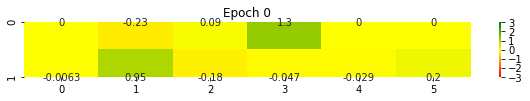

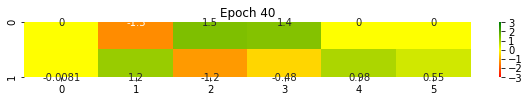

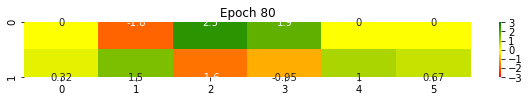

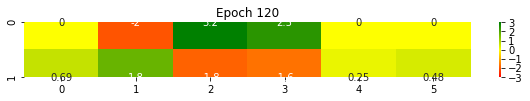

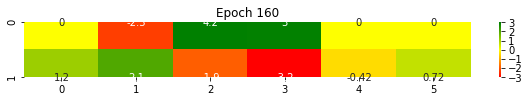

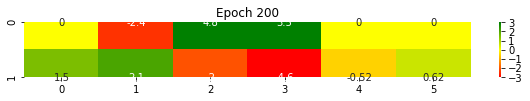

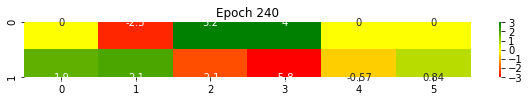

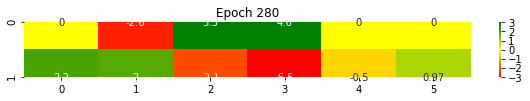

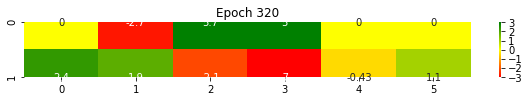

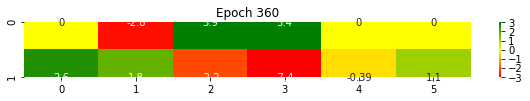

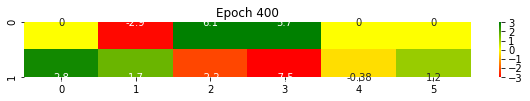

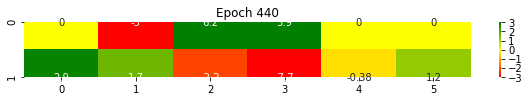

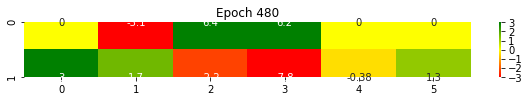

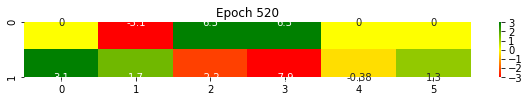

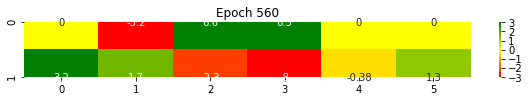

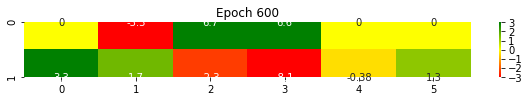

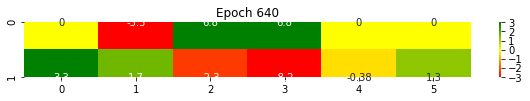

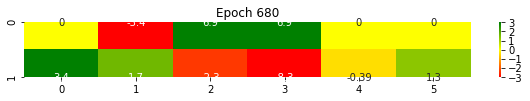

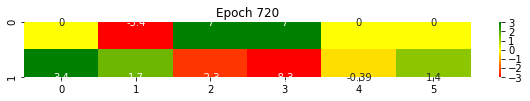

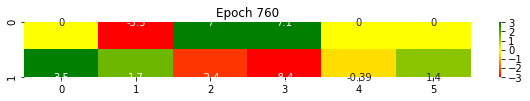

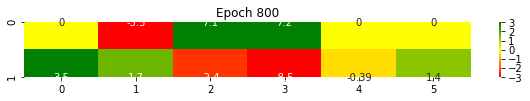

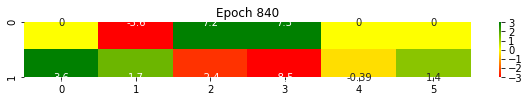

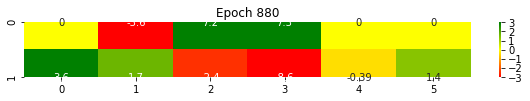

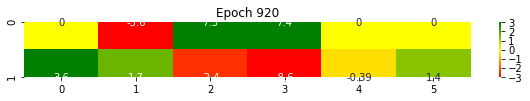

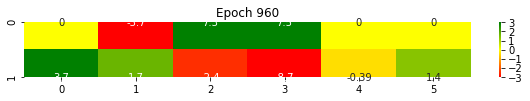

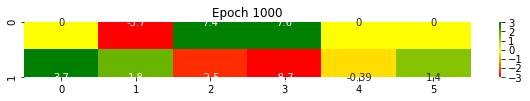

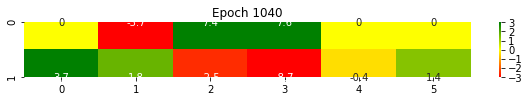

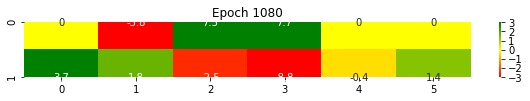

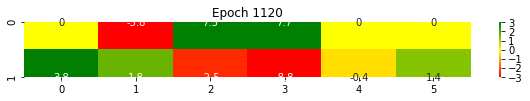

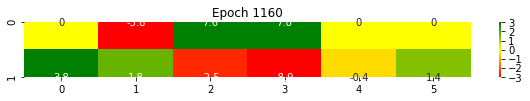

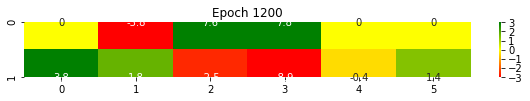

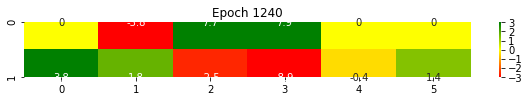

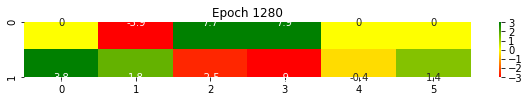

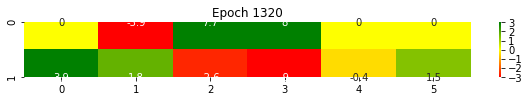

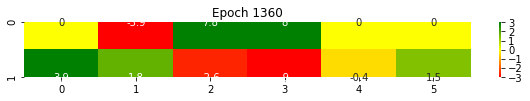

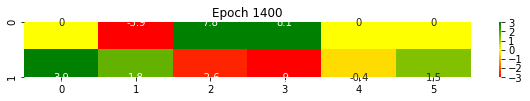

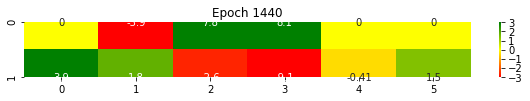

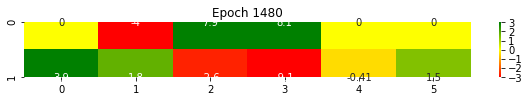

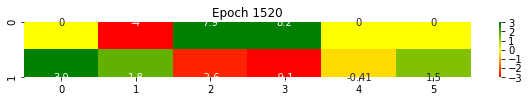

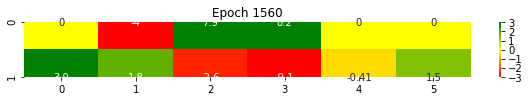

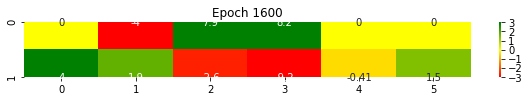

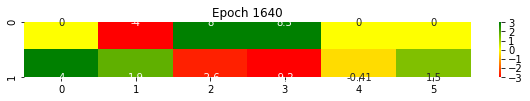

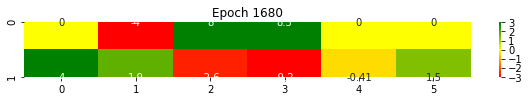

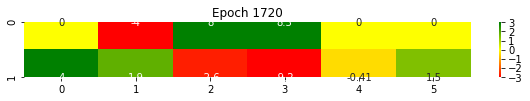

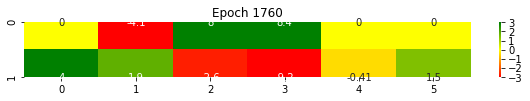

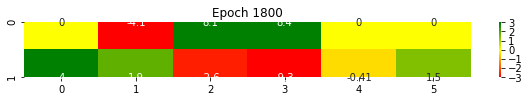

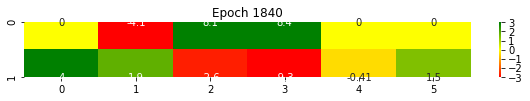

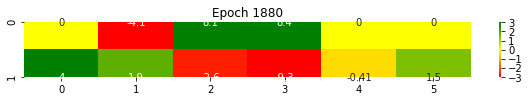

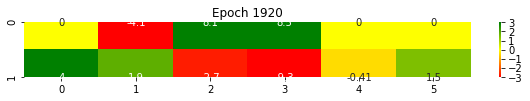

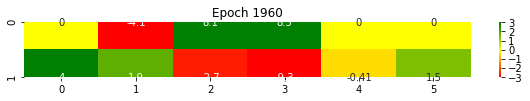

In [103]:
imageio.mimsave('./weights_viz.gif',[plot_heat_map(i) for i in range(0, len(weight_matrices),len(weight_matrices)//50)], fps =1 )

In [105]:
from IPython import display
HTML('<img src="weights_viz.gif">')

In [106]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarized_train = (Y_pred_train >= 0.5).astype('int').ravel()

Y_pred_val = ffn.predict(X_val)
Y_pred_binarized_val = (Y_pred_val >=0.5).astype('int').ravel()

accuracy_train = accuracy_score(Y_train, Y_pred_binarized_train)
accuracy_val = accuracy_score(Y_val, Y_pred_binarized_val)

print("Training Accuracy", round(accuracy_train,2))
print("Validation Accuracy", round(accuracy_val,2))

Training Accuracy 0.98
Validation Accuracy 0.94


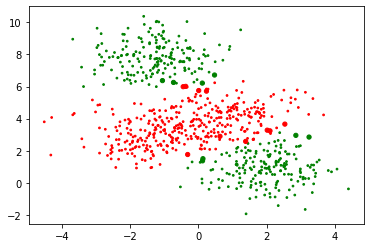

In [107]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarized_train,cmap=my_cmap, s =15*(np.abs(Y_pred_binarized_train-Y_train)+0.2))
plt.show()